<a href="https://colab.research.google.com/github/gourkshitij9/Handwritten-Digit-Recognition/blob/main/Digit_Prediction_Tflite_Conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy.random import seed 
seed(1)
import tensorflow as tf
tf.random.set_seed(1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

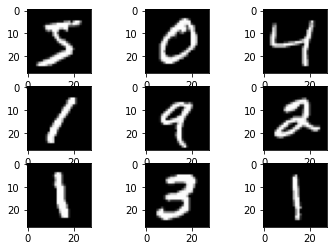

In [ ]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
 
plt.show()

In [ ]:
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalization
x_train /= 255
x_test /= 255

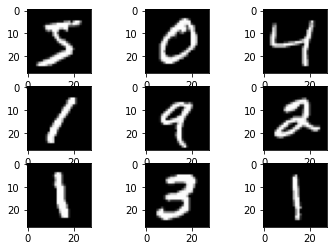

In [ ]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
def cnn_model_Max():
  model = Sequential()
  model.add(Conv2D(filters= 64, kernel_size= (3,3), strides= (1,1),padding= 'same',   activation= 'relu', input_shape= (28,28,1)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(filters= 128, kernel_size= (3,3), strides= (1,1),padding= 'same', activation= 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(filters= 256, kernel_size= (3,3), strides= (1,1),padding= 'same', activation= 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(units= 128, activation= 'relu'))
  model.add(Dense(units= 10, activation= 'softmax'))
  model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])
  return model

In [ ]:
model = cnn_model_Max()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [ ]:
history = model.fit(x=x_train,y=y_train, epochs=10, batch_size= 64, validation_split= 0.1, shuffle=False)

Epoch 1/10
844/844 [==============================] - 41s 13ms/step - loss: 0.3436 - accuracy: 0.8950 - val_loss: 0.0382 - val_accuracy: 0.9903
Epoch 2/10
844/844 [==============================] - 10s 12ms/step - loss: 0.0442 - accuracy: 0.9868 - val_loss: 0.0459 - val_accuracy: 0.9867
Epoch 3/10
844/844 [==============================] - 10s 12ms/step - loss: 0.0282 - accuracy: 0.9916 - val_loss: 0.0436 - val_accuracy: 0.9873
Epoch 4/10
844/844 [==============================] - 10s 12ms/step - loss: 0.0195 - accuracy: 0.9936 - val_loss: 0.0394 - val_accuracy: 0.9905
Epoch 5/10
844/844 [==============================] - 10s 12ms/step - loss: 0.0139 - accuracy: 0.9956 - val_loss: 0.0401 - val_accuracy: 0.9900
Epoch 6/10
844/844 [==============================] - 10s 12ms/step - loss: 0.0107 - accuracy: 0.9967 - val_loss: 0.0531 - val_accuracy: 0.9850
Epoch 7/10
844/844 [==============================] - 10s 12ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0589 - val_accuracy:

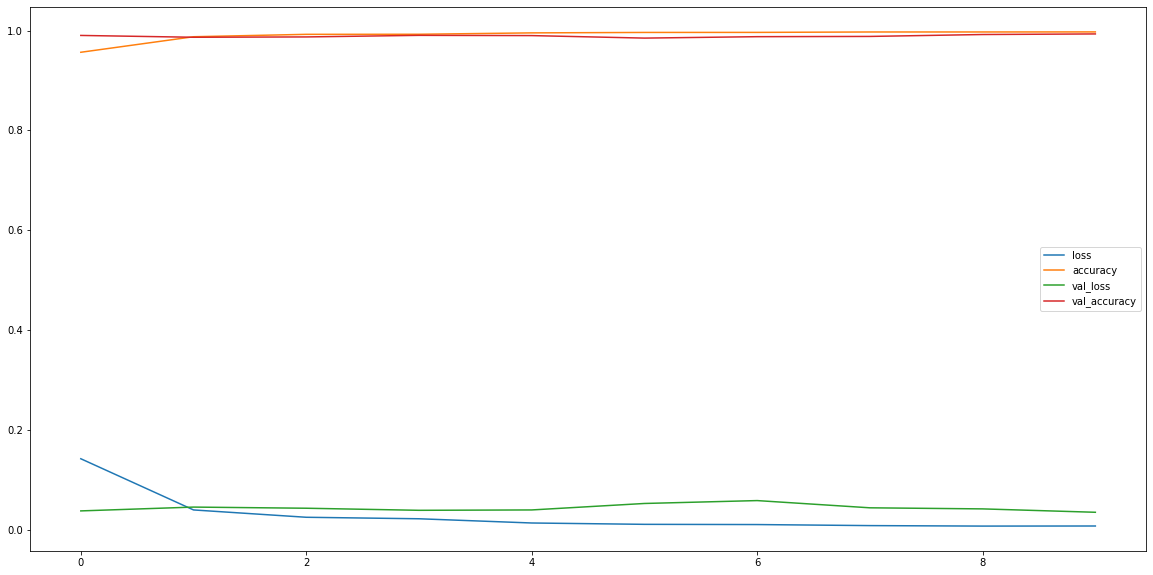

In [ ]:
pd.DataFrame(history.history)
pd.DataFrame(history.history).plot(figsize = (20,10))

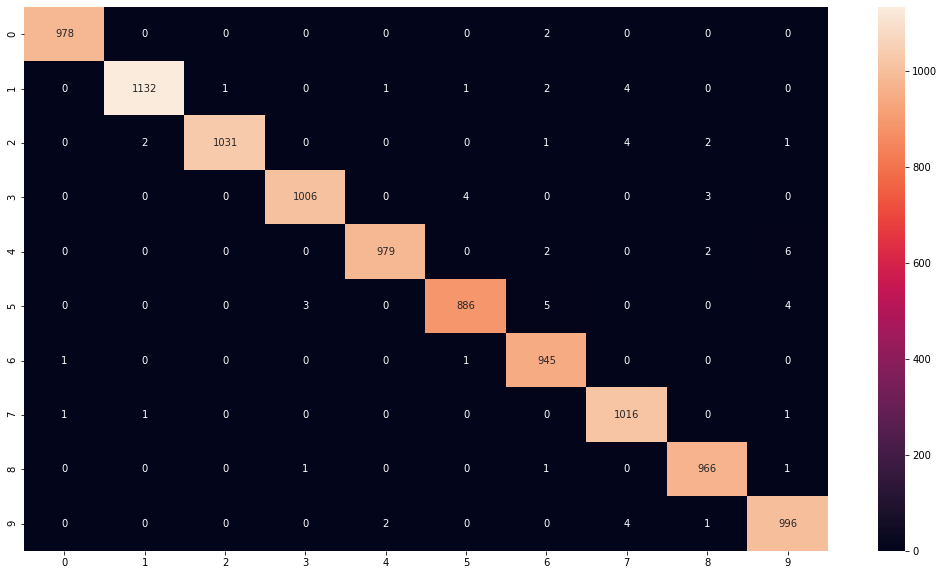

In [ ]:
predict_model = model.predict(x_test)
predict_model = np.argmax(predict_model, axis= 1)
plt.figure(figsize = (18,10))
sns.heatmap(confusion_matrix(predict_model, y_test), annot = True, fmt = '0.0f')

In [ ]:
accuracy_score(predict_model, y_test)

0.9935

In [ ]:
model.save("/content/drive/MyDrive/Project/Digit Pred App")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Project/Digit Pred App/assets


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model("/content/drive/MyDrive/Project/Digit Pred App") # path to the SavedModel directory
tflite_model = converter.convert()

In [ ]:
with open('/content/drive/MyDrive/Project/Digit Pred App/model.tflite', 'wb') as f:
  f.write(tflite_model)